# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)
# print(cities)

615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [6]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [7]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')
        

Beginning Data Retrieval
---------------------
Processing City # 1 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=amderma
City not found. skipping...
Processing City # 2 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=bambous+virieux
Processing City # 3 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=punta+arenas
Processing City # 4 | santa fe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=santa+fe
Processing City # 5 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=puerto+ayora
Processing City # 6 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=cape+town
Processing City # 7 | joensuu
http://

Processing City # 56 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=faanui
Processing City # 57 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=namibe
Processing City # 58 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sterling
Processing City # 59 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=karratha
Processing City # 60 | altar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=altar
Processing City # 61 | mocuba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=mocuba
Processing City # 62 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=lebu
Processing City # 

Processing City # 113 | homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=homer
Processing City # 114 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=leshukonskoye
Processing City # 115 | patacamaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=patacamaya
Processing City # 116 | new port richey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=new+port+richey
Processing City # 117 | kristiansund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kristiansund
Processing City # 118 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=port+elizabeth
Processing City # 119 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing City # 169 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kodiak
Processing City # 170 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sitka
Processing City # 171 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=tazovskiy
Processing City # 172 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=yar-sale
Processing City # 173 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=zyryanka
Processing City # 174 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=whitehorse
Processing City # 175 | itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&

Processing City # 226 | asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=asyut
Processing City # 227 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=hasaki
Processing City # 228 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sentyabrskiy
City not found. skipping...
Processing City # 229 | lithakia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=lithakia
Processing City # 230 | vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=vaitape
Processing City # 231 | guanhaes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=guanhaes
Processing City # 232 | trujillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea2

Processing City # 282 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=iqaluit
Processing City # 283 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kieta
Processing City # 284 | kulachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kulachi
Processing City # 285 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=esperance
Processing City # 286 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=walvis+bay
Processing City # 287 | kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kidal
Processing City # 288 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=yumen
P

Processing City # 338 | gafargaon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=gafargaon
Processing City # 339 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sechura
Processing City # 340 | morwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=morwa
Processing City # 341 | nazarovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=nazarovo
Processing City # 342 | stabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=stabat
Processing City # 343 | itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=itoman
Processing City # 344 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=acajutla

Processing City # 395 | navsari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=navsari
Processing City # 396 | sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=sosnovo-ozerskoye
Processing City # 397 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=port+macquarie
Processing City # 398 | kwinana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kwinana
Processing City # 399 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=zhigansk
Processing City # 400 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=san+quintin
Processing City # 401 | birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing City # 451 | monroe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=monroe
Processing City # 452 | jiamusi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=jiamusi
Processing City # 453 | bensonville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=bensonville
Processing City # 454 | qarqin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=qarqin
Processing City # 455 | saint-leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=saint-leu
Processing City # 456 | weligama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=weligama
Processing City # 457 | chakia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&

Processing City # 508 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=fukue
Processing City # 509 | mendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=mendi
Processing City # 510 | kilis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kilis
Processing City # 511 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=nelson+bay
Processing City # 512 | ondorhaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=ondorhaan
City not found. skipping...
Processing City # 513 | tarbagatay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=tarbagatay
Processing City # 514 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea

Processing City # 564 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=olafsvik
City not found. skipping...
Processing City # 565 | kerema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=kerema
Processing City # 566 | atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=atasu
Processing City # 567 | new plymouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=new+plymouth
Processing City # 568 | zhob
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=zhob
Processing City # 569 | lao cai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea249a10337a85fd7a69cfe18e3fe5&q=lao+cai
Processing City # 570 | cruzeiro do sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cea24

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_df =[]
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [18]:
weather_df.count()

City               566
Cloudiness         566
Country            566
Date               566
Humidity           566
Lat                566
Lng                566
Max Temperature    566
Wind Speed         566
dtype: int64

In [19]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,bambous virieux,75,MU,1561592470,88,-20.34,57.76,73.40,11.41
1,punta arenas,0,CL,1561592471,79,-53.16,-70.91,30.00,12.75
2,santa fe,0,AR,1561592471,67,-31.62,-60.70,44.33,9.78
3,puerto ayora,20,EC,1561592459,65,-0.74,-90.35,78.80,20.80
4,cape town,90,ZA,1561592401,100,-33.93,18.42,53.01,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [20]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

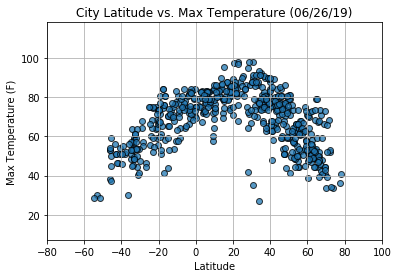

In [21]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

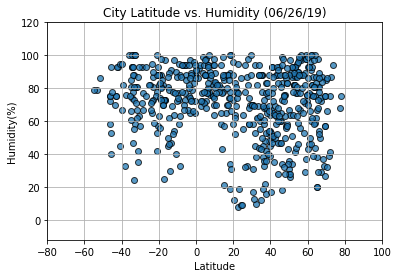

In [22]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity

#### Latitude vs. Cloudiness Plot

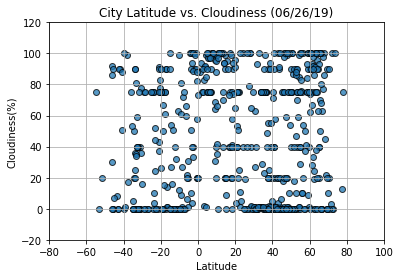

In [23]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

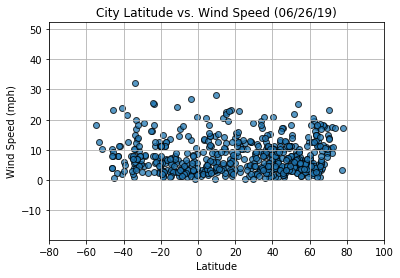

In [24]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

In [26]:
# Weather Data Analysis

# As we approach the equator the temperature increases.
# Since data has been collected in summer the temperatures are warmer in northen hemisphire.
# There is no relationship between city latitude and wind speed, cloudiness and Humidity.